In [1]:
#!unzip - "/content/drive/MyDrive/yolov5neww/eaglevieww.zip" -d "/content/drive/MyDrive/yolov5neww/eaglevieww"

Archive:  /content/drive/MyDrive/yolov5neww/eaglevieww.zip
cecda5dd3b26d1684d685b26e6f8d285dd070fe2
   creating: /content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main/
  inflating: /content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main/README.md  
   creating: /content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main/data/
  inflating: /content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main/data/Yolo_preprocess.py  
  inflating: /content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main/eagleviews.csv  
  inflating: /content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main/generate_yolo_txt.py  
  inflating: /content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main/yOLOV5_ev_ass.ipynb  


In [2]:
#loading the json file
import json
import pandas as pd
# Opening JSON file
f = open('bbox-annotations.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)

In [3]:
#creating a dataframe of images dict
df_images = pd.DataFrame(data['images'])
df_images.head()

,file_name,width,height,id,license
0,image_000000001.jpg,1024,768,0,1
1,image_000000002.jpg,1024,576,1,1
2,image_000000003.jpg,1024,683,2,1
3,image_000000004.jpg,1024,675,3,1
4,image_000000005.jpg,1024,926,4,1


In [4]:
#creating a dataframe of annotations dict
df_annotations = pd.DataFrame(data['annotations'])
df_annotations.head()

,category_id,image_id,segmentation,iscrowd,bbox,area,id,license
0,1,0,[],0,"[846, 145, 146, 477]",0.088554,0,2
1,1,0,[],0,"[848, 216, 175, 551]",0.122611,1,2
2,2,0,[],0,"[74, 159, 75, 81]",0.007725,2,2
3,2,0,[],0,"[153, 124, 658, 643]",0.537992,3,2
4,1,1,[],0,"[488, 281, 28, 71]",0.003370,4,2


In [5]:
#merging both the columns
df = pd.merge(df_images, df_annotations,left_on='id', right_on='image_id')
df.head()

,file_name,width,height,id_x,license_x,category_id,image_id,segmentation,iscrowd,bbox,area,id_y,license_y
0,image_000000001.jpg,1024,768,0,1,1,0,[],0,"[846, 145, 146, 477]",0.088554,0,2
1,image_000000001.jpg,1024,768,0,1,1,0,[],0,"[848, 216, 175, 551]",0.122611,1,2
2,image_000000001.jpg,1024,768,0,1,2,0,[],0,"[74, 159, 75, 81]",0.007725,2,2
3,image_000000001.jpg,1024,768,0,1,2,0,[],0,"[153, 124, 658, 643]",0.537992,3,2
4,image_000000002.jpg,1024,576,1,1,1,1,[],0,"[488, 281, 28, 71]",0.003370,4,2


In [6]:
%cd /content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main/

/content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main


In [7]:
#Preprocessing step from datafolder
from data.Yolo_preprocess import Preprocessing

In [8]:
EagleView = Preprocessing(df)

In [9]:
#converting coco values to yolo format
EagleView.converttoyolo()

,file_name,category_id,id_y,x,y,w,h
0,image_000000001.jpg,1,0,0.897461,0.499349,0.142578,0.621094
1,image_000000001.jpg,1,1,0.913574,0.639974,0.170898,0.717448
2,image_000000001.jpg,2,2,0.108887,0.259766,0.073242,0.105469
3,image_000000001.jpg,2,3,0.470703,0.580078,0.642578,0.837240
4,image_000000002.jpg,1,4,0.490234,0.549479,0.027344,0.123264
...,...,...,...,...,...,...,...
16767,image_000002238.jpg,2,16767,0.772949,0.038799,0.112305,0.077599
16768,image_000002238.jpg,2,16768,0.878906,0.042460,0.060547,0.061493
16769,image_000002239.jpg,1,16769,0.202148,0.234307,0.029297,0.068613
16770,image_000002239.jpg,1,16770,0.527344,0.427737,0.128906,0.356204


In [10]:
#since yolo accepts 0-n values in classes
EagleView.replace()

,file_name,category_id,id_y,x,y,w,h
0,image_000000001.jpg,0,0,0.897461,0.499349,0.142578,0.621094
1,image_000000001.jpg,0,1,0.913574,0.639974,0.170898,0.717448
2,image_000000001.jpg,1,2,0.108887,0.259766,0.073242,0.105469
3,image_000000001.jpg,1,3,0.470703,0.580078,0.642578,0.837240
4,image_000000002.jpg,0,4,0.490234,0.549479,0.027344,0.123264
...,...,...,...,...,...,...,...
16767,image_000002238.jpg,1,16767,0.772949,0.038799,0.112305,0.077599
16768,image_000002238.jpg,1,16768,0.878906,0.042460,0.060547,0.061493
16769,image_000002239.jpg,0,16769,0.202148,0.234307,0.029297,0.068613
16770,image_000002239.jpg,0,16770,0.527344,0.427737,0.128906,0.356204


In [20]:
%cd /content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main/

/content/drive/MyDrive/yolov5neww/eaglevieww/eagleview-main


In [26]:
#creating a csv file
df.to_csv('eagleviews.csv')

In [27]:
%cd /content


/content


In [23]:
!git clone https://github.com/tech-mayank/converting-xml-to-tfrecords-or-yolo-format.git


Cloning into 'converting-xml-to-tfrecords-or-yolo-format'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 49 (delta 18), reused 32 (delta 10), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [28]:
#converting csv files into txt files 
!python converting-xml-to-tfrecords-or-yolo-format/generate_yolo_txt.py /content/eagleviews.csv /content/drive/MyDrive/yolov5newtxt

groups: 100% 2239/2239 [00:12<00:00, 176.14it/s]


In [29]:
!unzip "/content/drive/MyDrive/yolov5neww/yololv5new.zip" -d "/content/drive/MyDrive/yolov5neww/yololv5new1"

Archive:  /content/drive/MyDrive/yolov5neww/yololv5new.zip
   creating: /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/train/
   creating: /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/train/images/
  inflating: /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/train/images/image_000000001.jpg  
  inflating: /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/train/images/image_000000002.jpg  
  inflating: /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/train/images/image_000000003.jpg  
  inflating: /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/train/images/image_000000004.jpg  
  inflating: /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/train/images/image_000000005.jpg  
  inflating: /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/train/images/image_000000006.jpg  
  inflating: /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/train/images/image_000000007.jpg  
  inflating: /content/drive/MyDrive/yolov5new

In [30]:
%cd /content


/content


In [31]:
!git clone https://github.com/ultralytics/yolov5.git


Cloning into 'yolov5'...
remote: Enumerating objects: 10843, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 10843 (delta 0), reused 1 (delta 0), pack-reused 10839
Receiving objects: 100% (10843/10843), 10.92 MiB | 32.90 MiB/s, done.
Resolving deltas: 100% (7486/7486), done.


In [32]:
%cd yolov5/


/content/yolov5


In [33]:
!pip install -r requirements.txt


     |████████████████████████████████| 596 kB 30.8 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [36]:
!python train.py --img 400 --batch 8 --epochs 10 --data coco128.yaml --weights yolov5s.pt --nosave --cache 


train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=10, batch_size=8, imgsz=400, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-232-g079b36d torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, sh

In [41]:
!python train.py --weights /content/yolov5/runs/train/exp/weights/last.pt --epochs 4 --img 400


train: weights=/content/yolov5/runs/train/exp/weights/last.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=4, batch_size=16, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-232-g079b36d torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4

In [42]:
#inferences

!python detect.py --source /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/valid/images --weights /content/yolov5/runs/train/exp/weights/last.pt --img 416 --save-txt --save-conf


detect: weights=['/content/yolov5/runs/train/exp/weights/last.pt'], source=/content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-232-g079b36d torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/204 /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/valid/images/image_000002036.jpg: 416x288 2 persons, Done. (0.015s)
image 2/204 /content/drive/MyDrive/yolov5neww/yololv5new1/yololv5new/valid/images/image_000002037.jpg: 288x416 24 persons, Done. (0.015s)
image 3/204 /content/drive/MyDrive/

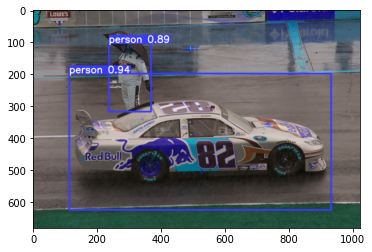

In [45]:

%matplotlib inline

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("/content/yolov5/runs/detect/exp3/image_000002038.jpg")

#Show the image with matplotlib
plt.imshow(image)
plt.show()

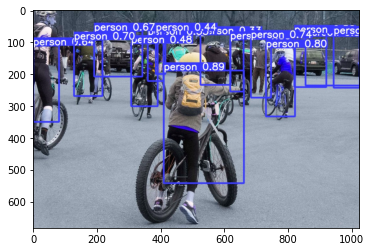

In [46]:

%matplotlib inline

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("/content/yolov5/runs/detect/exp3/image_000002047.jpg")

#Show the image with matplotlib
plt.imshow(image)
plt.show()

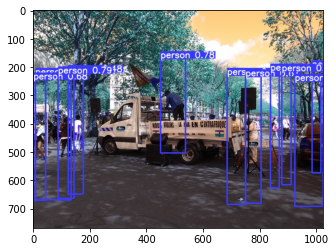

In [47]:

%matplotlib inline

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("/content/yolov5/runs/detect/exp3/image_000002064.jpg")

#Show the image with matplotlib
plt.imshow(image)
plt.show()